In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hate-speech-dataset-amharic/Posts.txt
/kaggle/input/hate-speech-dataset-amharic/Labels.txt


## Data Reading Phase

In [2]:
corpus = pd.read_csv("/kaggle/input/hate-speech-dataset-amharic/Posts.txt",header=None)
label = pd.read_csv("/kaggle/input/hate-speech-dataset-amharic/Labels.txt",header=None)
label = label.replace(' Free', 'Free')
label = label.replace('Free ', 'Free')
label = label.replace(' Hate', 'Hate')
label = label.replace('Hate ', 'Hate')





print(len(corpus))
print(len(label))


print(corpus.head())
print(label.head())

30000
30000
                                                   0
0  አስቀድሜ ጥያቄዬ በጨዋነት በውስጥ መስመር እንዲደርስዎ አድርጌ ፍትህን ለ...
1   እነዚህን ወሳኝ ጉዳዮችን የሚያስፈፅም አካል እንዲቋቋምና ክትትል እንዲደ...
2  የአማራ ህዝብ በአእምሮ ክንፉ ያልበረረበት ጥበብና ፍልስፍና ያልከፈተው የ...
3  ከአማራ ህዝብ የሀገሪቱ ዘርፈ ብዙ እውቀት መንጭቶ የሞላበትከሙላቱም በመል...
4  ዛሬ በየትኛውም መለኪያ ይሁን መመዘኛ ኢትዮጵያዊነት የሚንፀባረቀው በአማራ...
      0
0  Free
1  Free
2  Free
3  Free
4  Hate


In [3]:
merged_table = pd.DataFrame({'sentences': corpus[0], 'labels': label[0]},index = range(len(corpus)))
merged_table.head()

,sentences,labels
0,አስቀድሜ ጥያቄዬ በጨዋነት በውስጥ መስመር እንዲደርስዎ አድርጌ ፍትህን ለ...,Free
1,እነዚህን ወሳኝ ጉዳዮችን የሚያስፈፅም አካል እንዲቋቋምና ክትትል እንዲደ...,Free
2,የአማራ ህዝብ በአእምሮ ክንፉ ያልበረረበት ጥበብና ፍልስፍና ያልከፈተው የ...,Free
3,ከአማራ ህዝብ የሀገሪቱ ዘርፈ ብዙ እውቀት መንጭቶ የሞላበትከሙላቱም በመል...,Free
4,ዛሬ በየትኛውም መለኪያ ይሁን መመዘኛ ኢትዮጵያዊነት የሚንፀባረቀው በአማራ...,Hate


## Pre- Processing Phase

In [4]:
## phase one adding num_words for simplicity of calculations
merged_table['num_words'] = merged_table['sentences'].apply(lambda x: len(x.split()))
merged_table.head()


,sentences,labels,num_words
0,አስቀድሜ ጥያቄዬ በጨዋነት በውስጥ መስመር እንዲደርስዎ አድርጌ ፍትህን ለ...,Free,63
1,እነዚህን ወሳኝ ጉዳዮችን የሚያስፈፅም አካል እንዲቋቋምና ክትትል እንዲደ...,Free,10
2,የአማራ ህዝብ በአእምሮ ክንፉ ያልበረረበት ጥበብና ፍልስፍና ያልከፈተው የ...,Free,19
3,ከአማራ ህዝብ የሀገሪቱ ዘርፈ ብዙ እውቀት መንጭቶ የሞላበትከሙላቱም በመል...,Free,23
4,ዛሬ በየትኛውም መለኪያ ይሁን መመዘኛ ኢትዮጵያዊነት የሚንፀባረቀው በአማራ...,Hate,25


### finding the most frequent number of words

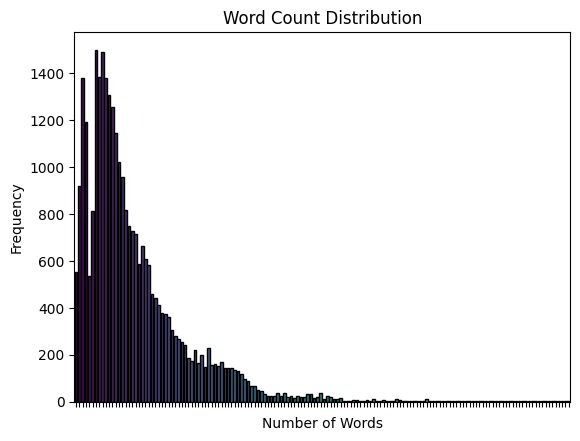

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('viridis')

# Create a bar plot of the word count distribution with varying colors using seaborn
sns.barplot(x=merged_table['num_words'].value_counts().index,
            y=merged_table['num_words'].value_counts().sort_index(),
            palette='viridis', edgecolor='black').set_xticklabels([])


plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [6]:
# using boolean masking to eliminate small word sentences so that they won't cause errors
merged_table = merged_table[merged_table['num_words']> 2]
merged_table = merged_table[merged_table['num_words']< 85]
merged_table = merged_table[['sentences','num_words','labels']] 
len(merged_table)

28468

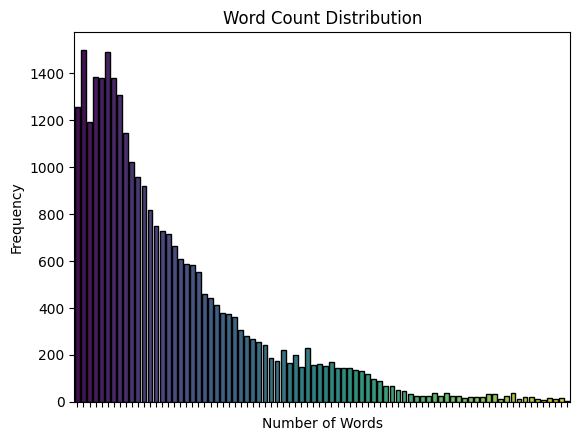

In [7]:
sns.set_palette('viridis')

# Create a bar plot of the word count distribution with varying colors using seaborn
sns.barplot(x=merged_table['num_words'].value_counts().index,
            y=merged_table['num_words'].value_counts().sort_index(),
            palette='viridis', edgecolor='black').set_xticklabels([])


plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [8]:
merged_table.head()

,sentences,num_words,labels
0,አስቀድሜ ጥያቄዬ በጨዋነት በውስጥ መስመር እንዲደርስዎ አድርጌ ፍትህን ለ...,63,Free
1,እነዚህን ወሳኝ ጉዳዮችን የሚያስፈፅም አካል እንዲቋቋምና ክትትል እንዲደ...,10,Free
2,የአማራ ህዝብ በአእምሮ ክንፉ ያልበረረበት ጥበብና ፍልስፍና ያልከፈተው የ...,19,Free
3,ከአማራ ህዝብ የሀገሪቱ ዘርፈ ብዙ እውቀት መንጭቶ የሞላበትከሙላቱም በመል...,23,Free
4,ዛሬ በየትኛውም መለኪያ ይሁን መመዘኛ ኢትዮጵያዊነት የሚንፀባረቀው በአማራ...,25,Hate


## number of labels across the training set

<Axes: xlabel='labels'>

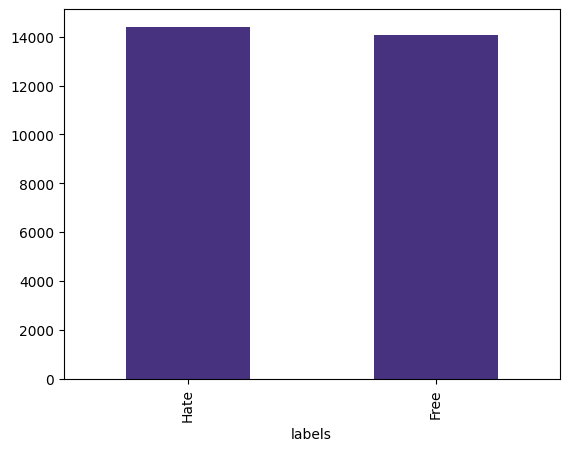

In [9]:
merged_table['labels'].value_counts().plot(kind="bar")

In [10]:
merged_table = merged_table[['sentences','labels']]
merged_table.head()

,sentences,labels
0,አስቀድሜ ጥያቄዬ በጨዋነት በውስጥ መስመር እንዲደርስዎ አድርጌ ፍትህን ለ...,Free
1,እነዚህን ወሳኝ ጉዳዮችን የሚያስፈፅም አካል እንዲቋቋምና ክትትል እንዲደ...,Free
2,የአማራ ህዝብ በአእምሮ ክንፉ ያልበረረበት ጥበብና ፍልስፍና ያልከፈተው የ...,Free
3,ከአማራ ህዝብ የሀገሪቱ ዘርፈ ብዙ እውቀት መንጭቶ የሞላበትከሙላቱም በመል...,Free
4,ዛሬ በየትኛውም መለኪያ ይሁን መመዘኛ ኢትዮጵያዊነት የሚንፀባረቀው በአማራ...,Hate


In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D



### Train Test Split for the data

In [12]:
corpus = merged_table["sentences"].values
labels = merged_table["labels"].values
label_encoder = LabelEncoder()
labelsencoded = label_encoder.fit_transform(labels)
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labelsencoded, test_size=0.2, random_state=42)



### Model Building using RNN (Recurrent Neural Networks)

In [13]:
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=5000,output_dim=64,input_length=100))
rnn_model.add(LSTM(64))
rnn_model.add(Dense(1,activation='sigmoid')) #since it is a binary classification
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.summary()
rnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           320000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 353089 (1.35 MB)
Trainable params: 353089 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
641/641 [==============================] - 33s 47ms/step - loss: 0.6932 - accuracy: 0.5055 - val_loss: 0.6940 - val_accuracy: 0.4947
Epoch 2/30
641/641 [==============================] - 31s 48ms/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4

In [14]:
test_values = rnn_model.evaluate(X_test,y_test)

178/178 [==============================] - 2s 13ms/step - loss: 0.6932 - accuracy: 0.5049


In [15]:
print(f'the accuracy on test values: {test_values[1]}')

the accuracy on test values: 0.5049174427986145


In [16]:
rnn_model.save('rnn_model.keras')